Note:
Go to Read.me file to understand the steps:
The file contains detailed instructions about how you can preprocess your data and visualize it using matplotlib file

the file is the the 2nd part

**case 2  Pre Processing of Data**


***Case 2  Preprocessing Steps***

In [212]:
try:
    import json
    import os

    import pandas as  pd
    import spacy

    import seaborn as sns
    import string

    from tqdm import tqdm
    from textblob import TextBlob

    from nltk.corpus import stopwords
    import nltk
    from nltk.stem import WordNetLemmatizer
    from nltk import word_tokenize
    import re
    import requests,openpyxl
    import pandas as pd
    import numpy as np

    import openpyxl


    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import LabelEncoder
    from sklearn.feature_extraction.text import CountVectorizer
    from sklearn.feature_extraction.text import TfidfTransformer
    from sklearn.naive_bayes import MultinomialNB
    from sklearn.pipeline import Pipeline


    from sklearn.preprocessing import FunctionTransformer
    from sklearn.base import BaseEstimator, TransformerMixin
    from sklearn.pipeline import FeatureUnion
    from sklearn.feature_extraction import DictVectorizer
    !pip install swifter
    import swifter

    tqdm.pandas()
except Exception as e:
    print("Error : {} ".format(e))

In [213]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [277]:
import openpyxl
df = pd.read_excel(r'/content/my_final_sheet.xlsx')

In [278]:
df

,TITLE,DESCRIPTION,LINK,Published Date
0,Xi Jinping celebrates China’s rising power — a...,NaN,http://www.pbs.org/newshour/bb/xi-jinping-cele...,"Wed, 18 Oct 2017 22:35:21 +0000"
1,"The battle for Mosul is over, but this hidden ...",NaN,http://www.pbs.org/newshour/bb/battle-mosul-hi...,"Wed, 18 Oct 2017 22:20:26 +0000"
2,As Rohingya refugees continue to flee from per...,NaN,http://www.pbs.org/newshour/rundown/rohingya-r...,"Wed, 18 Oct 2017 20:58:34 +0000"
3,Tillerson: ‘Heartbreaking’ reports of sufferin...,NaN,http://www.pbs.org/newshour/rundown/tillerson-...,"Wed, 18 Oct 2017 15:36:51 +0000"
4,Far-right groups gain ground in Sweden and Ger...,NaN,http://www.pbs.org/newshour/bb/far-right-group...,"Tue, 17 Oct 2017 22:30:37 +0000"
...,...,...,...,...
194,Secret calls and code names: The risky busines...,NaN,https://www.bbc.co.uk/news/world-asia-68065475...,NaN
195,Lily Gladstone: The Native American actress wh...,NaN,https://www.bbc.co.uk/news/entertainment-arts-...,NaN
196,"Pep Guardiola, Jose Mourinho and the game that...",NaN,https://www.bbc.co.uk/sport/football/68082238?...,NaN
197,Kenya ETA: President Ruto's vision of visa-fre...,NaN,https://www.bbc.co.uk/news/world-africa-680934...,NaN


In [279]:
df.describe()

,TITLE,DESCRIPTION,LINK,Published Date
count,199,55,199,148
unique,199,55,199,145
top,Xi Jinping celebrates China’s rising power — a...,The post Aftermath of flooding in Brazil’s Ama...,http://www.pbs.org/newshour/bb/xi-jinping-cele...,"Sat, 27 Jan 2024 09:00:00 GMT"
freq,1,1,1,3


In [280]:
df.isna().sum()

TITLE               0
DESCRIPTION       144
LINK                0
Published Date     51
dtype: int64

Heatmap before pre processing
Yellow area shows missing values in our model


<Axes: >

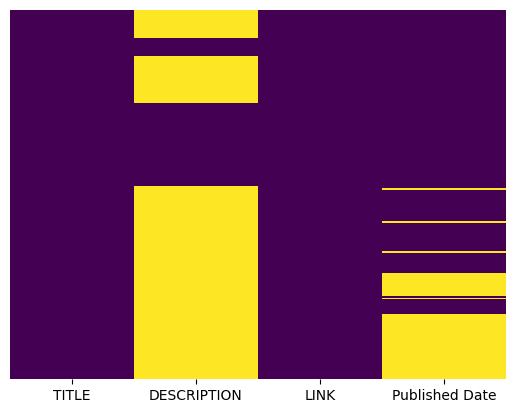

In [281]:
import seaborn as sns

sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

**Step 1:** We Remove our Null,NaN Values in Published Date,Description Column and Description Column

In [282]:
df['Published Date'] = pd.to_datetime(df['Published Date'], errors='coerce')

# print(df['Published Date'].dtype)
df['Published Date'] = df['Published Date'].astype(str)

df['Published Date'] = df['Published Date'].apply(lambda x: x.replace('+00:00', ' '))
df['DESCRIPTION'] = df['DESCRIPTION'].fillna('')
df['Published Date'] = df['Published Date'].fillna('')


In [283]:
df.head(5)

,TITLE,DESCRIPTION,LINK,Published Date
0,Xi Jinping celebrates China’s rising power — a...,,http://www.pbs.org/newshour/bb/xi-jinping-cele...,2017-10-18 22:35:21
1,"The battle for Mosul is over, but this hidden ...",,http://www.pbs.org/newshour/bb/battle-mosul-hi...,2017-10-18 22:20:26
2,As Rohingya refugees continue to flee from per...,,http://www.pbs.org/newshour/rundown/rohingya-r...,2017-10-18 20:58:34
3,Tillerson: ‘Heartbreaking’ reports of sufferin...,,http://www.pbs.org/newshour/rundown/tillerson-...,2017-10-18 15:36:51
4,Far-right groups gain ground in Sweden and Ger...,,http://www.pbs.org/newshour/bb/far-right-group...,2017-10-17 22:30:37


Area is whole purple shows there are no value NaN and all of the values are removed who are NaN

<Axes: >

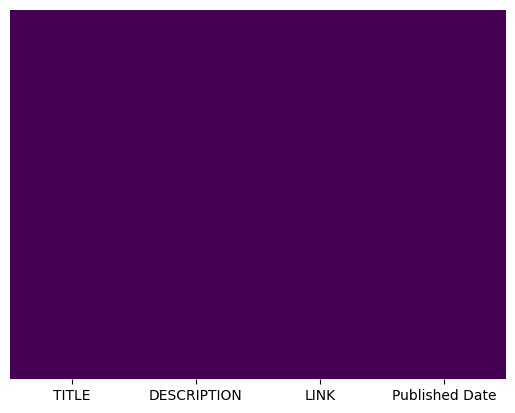

In [284]:
import seaborn as sns

sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [285]:
df.isna().sum()

TITLE             0
DESCRIPTION       0
LINK              0
Published Date    0
dtype: int64

In [286]:
df

,TITLE,DESCRIPTION,LINK,Published Date
0,Xi Jinping celebrates China’s rising power — a...,,http://www.pbs.org/newshour/bb/xi-jinping-cele...,2017-10-18 22:35:21
1,"The battle for Mosul is over, but this hidden ...",,http://www.pbs.org/newshour/bb/battle-mosul-hi...,2017-10-18 22:20:26
2,As Rohingya refugees continue to flee from per...,,http://www.pbs.org/newshour/rundown/rohingya-r...,2017-10-18 20:58:34
3,Tillerson: ‘Heartbreaking’ reports of sufferin...,,http://www.pbs.org/newshour/rundown/tillerson-...,2017-10-18 15:36:51
4,Far-right groups gain ground in Sweden and Ger...,,http://www.pbs.org/newshour/bb/far-right-group...,2017-10-17 22:30:37
...,...,...,...,...
194,Secret calls and code names: The risky busines...,,https://www.bbc.co.uk/news/world-asia-68065475...,nan
195,Lily Gladstone: The Native American actress wh...,,https://www.bbc.co.uk/news/entertainment-arts-...,nan
196,"Pep Guardiola, Jose Mourinho and the game that...",,https://www.bbc.co.uk/sport/football/68082238?...,nan
197,Kenya ETA: President Ruto's vision of visa-fre...,,https://www.bbc.co.uk/news/world-africa-680934...,nan


Now we combined  our description  and title column and  created a new column called text

In [287]:
df['text'] = df['TITLE']  +  " " + df['DESCRIPTION']

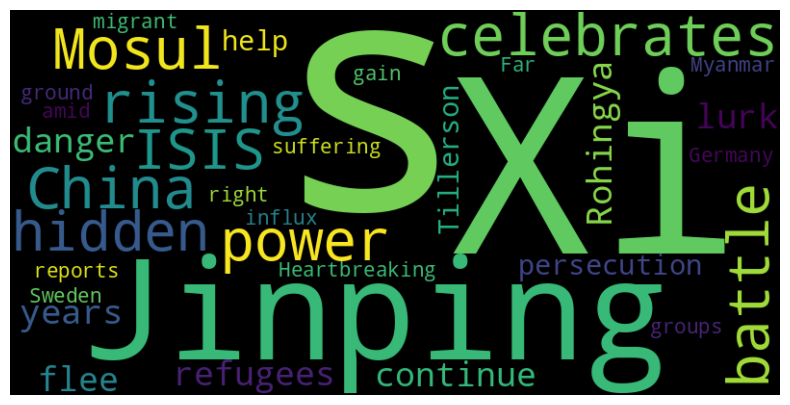

In [288]:
from wordcloud import WordCloud
def plot_word_cloud(text):
    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400).generate(text)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
import matplotlib.pyplot as plt
tags = ','.join(df['text'].head(5))

plot_word_cloud(tags)

In [290]:
stop_words_ = set(stopwords.words('english'))
wn = WordNetLemmatizer()
my_sw = ['make', 'amp',  'news','new' ,
  'time', 'u','s', 'photos',  'get', 'say']

def black_txt(token):
    return  token not in stop_words_ and token not in list(string.punctuation) and len(token)>2 and token not in my_sw

def clean_txt(text):
    clean_text = []
    clean_text2 = []
    text = re.sub("'", "",text)
    text=re.sub("(\\d|\\W)+"," ",text)
    clean_text = [ wn.lemmatize(word, pos="v") for word in
                  word_tokenize(text.lower()) if black_txt(word)]
    clean_text2 = [word for word in clean_text if black_txt(word)]
    return " ".join(clean_text2)

In [291]:
def subj_txt(text):
    return  TextBlob(text).sentiment[1]

def polarity_txt(text):
    return TextBlob(text).sentiment[0]

def len_text(text):
    if len(text.split())>0:
         return len(set(clean_txt(text).split()))/ len(text.split())
    else:
         return 0

See the difference in output of both the plots

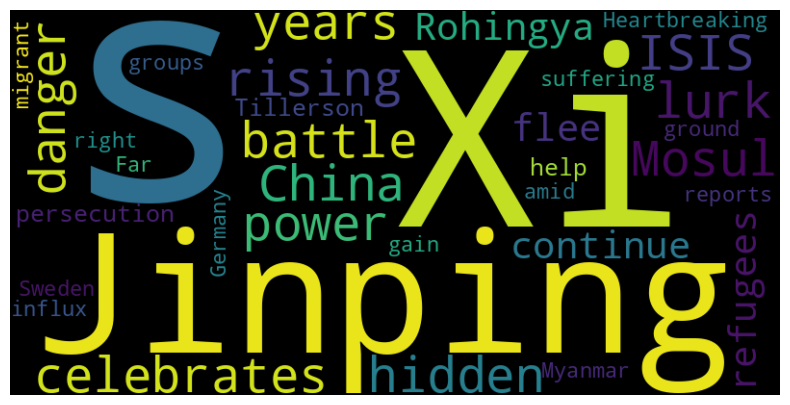

In [292]:

tags = ','.join(df['text'].head(5))

# Plot the word cloud for the concatenated tags
plot_word_cloud(tags)

In [293]:
df['text'] = df['text'].swifter.apply(clean_txt)
df['polarity'] = df['text'].swifter.apply(polarity_txt)
df['subjectivity'] = df['text'].swifter.apply(subj_txt)
df['len'] = df['text'].swifter.apply(lambda x: len(x))

Pandas Apply:   0%|          | 0/199 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/199 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/199 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/199 [00:00<?, ?it/s]

In [294]:
df

,TITLE,DESCRIPTION,LINK,Published Date,text,polarity,subjectivity,len
0,Xi Jinping celebrates China’s rising power — a...,,http://www.pbs.org/newshour/bb/xi-jinping-cele...,2017-10-18 22:35:21,jinping celebrate china rise power,0.000000,0.000000,34
1,"The battle for Mosul is over, but this hidden ...",,http://www.pbs.org/newshour/bb/battle-mosul-hi...,2017-10-18 22:20:26,battle mosul hide isis danger could lurk years,0.000000,0.000000,46
2,As Rohingya refugees continue to flee from per...,,http://www.pbs.org/newshour/rundown/rohingya-r...,2017-10-18 20:58:34,rohingya refugees continue flee persecution help,0.000000,0.000000,48
3,Tillerson: ‘Heartbreaking’ reports of sufferin...,,http://www.pbs.org/newshour/rundown/tillerson-...,2017-10-18 15:36:51,tillerson heartbreaking report suffer myanmar,0.000000,0.000000,45
4,Far-right groups gain ground in Sweden and Ger...,,http://www.pbs.org/newshour/bb/far-right-group...,2017-10-17 22:30:37,far right group gain grind sweden germany amid...,0.192857,0.767857,61
...,...,...,...,...,...,...,...,...
194,Secret calls and code names: The risky busines...,,https://www.bbc.co.uk/news/world-asia-68065475...,nan,secret call code name risky business send mone...,-0.400000,0.700000,53
195,Lily Gladstone: The Native American actress wh...,,https://www.bbc.co.uk/news/entertainment-arts-...,nan,lily gladstone native american actress could o...,0.000000,0.000000,59
196,"Pep Guardiola, Jose Mourinho and the game that...",,https://www.bbc.co.uk/sport/football/68082238?...,nan,pep guardiola jose mourinho game change everyt...,-0.400000,0.400000,50
197,Kenya ETA: President Ruto's vision of visa-fre...,,https://www.bbc.co.uk/news/world-africa-680934...,nan,kenya eta president rutos vision visa free ent...,0.400000,0.800000,61
